<a href="https://colab.research.google.com/github/KaylumCassidy/BMCA3/blob/main/TU912_4_Cassidy_Kaylum_C20323831_LabExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Acquisition - LabExam


## PART 1

### Cork

In [1]:
import urllib.request
import json
from prettytable import PrettyTable

# Function to download and parse JSON file
def download_and_parse_json(url):
    with urllib.request.urlopen(url) as response:
        data = json.load(response)
    return data

# Download and parse Cork data
cork_data = download_and_parse_json('https://prodapi.metweb.ie/monthly-data/Cork')

# Display samples for Cork location using PrettyTable
def display_samples_cork(data):
    table = PrettyTable(['Year', 'Month', 'Rainfall (mm)'])
    for year, month_data in data['total_rainfall']['report'].items():
        for month, rainfall in month_data.items():
            if month != 'annual':
                table.add_row([year, month, rainfall])
    print(table)

# Display samples for Cork location
print("\nCork Samples:")
display_samples_cork(cork_data)





Cork Samples:
+------+-----------+---------------+
| Year |   Month   | Rainfall (mm) |
+------+-----------+---------------+
| 2023 |  january  |     134.6     |
| 2023 |  february |      15.2     |
| 2023 |    mar    |     211.4     |
| 2023 |    apr    |      52.0     |
| 2023 |    may    |      44.9     |
| 2023 |    june   |      50.3     |
| 2023 |    july   |     145.2     |
| 2023 |   august  |     117.8     |
| 2023 | september |     171.4     |
| 2023 |  october  |     307.2     |
| 2023 |  november |     108.2     |
| 2023 |  december |      61.5     |
| 2022 |  january  |      38.3     |
| 2022 |  february |     112.3     |
| 2022 |    mar    |      61.9     |
| 2022 |    apr    |      64.9     |
| 2022 |    may    |      35.7     |
| 2022 |    june   |      84.1     |
| 2022 |    july   |      28.1     |
| 2022 |   august  |      14.2     |
| 2022 | september |     162.7     |
| 2022 |  october  |     232.5     |
| 2022 |  november |     203.4     |
| 2022 |  december |   

In [2]:
import urllib.request
import json
import pandas as pd

# Function to download and parse JSON file
def download_and_parse_json(url):
    with urllib.request.urlopen(url) as response:
        data = json.load(response)
    return data

# Function to extract rainfall data for a specific year
def extract_rainfall_data_for_year(data, year):
    rainfall_data = []
    for month, rainfall in data['total_rainfall']['report'].get(year, {}).items():
        if month != 'annual':
            rainfall_data.append({'Year': year, 'Month': month, 'Rainfall (mm)': rainfall})
    return rainfall_data

# Download and parse Cork data
cork_data = download_and_parse_json('https://prodapi.metweb.ie/monthly-data/Cork')

# Extract rainfall data for 2021
cork_rainfall_2021 = extract_rainfall_data_for_year(cork_data, '2021')

# Print the extracted data to the screen
print("\nCork Rainfall Data for 2021:")
for entry in cork_rainfall_2021:
    print(entry)

# Save the data to Part_I.csv
df_cork_2021 = pd.DataFrame(cork_rainfall_2021)
df_cork_2021.to_csv("Part_I.csv", index=False)

# Load Part_I.csv into a DataFrame
df_part_i = pd.read_csv("Part_I.csv")

# Choose one column (e.g., 'Rainfall (mm)') and read information from the result of the describe() function
rainfall_description_part_i = df_part_i["Rainfall (mm)"].describe()
print(f"\nDescribe for Rainfall (mm) column in Part_I.csv:\n{rainfall_description_part_i}")



Cork Rainfall Data for 2021:
{'Year': '2021', 'Month': 'january', 'Rainfall (mm)': '121.8'}
{'Year': '2021', 'Month': 'february', 'Rainfall (mm)': '235.9'}
{'Year': '2021', 'Month': 'mar', 'Rainfall (mm)': '67.5'}
{'Year': '2021', 'Month': 'apr', 'Rainfall (mm)': '18.2'}
{'Year': '2021', 'Month': 'may', 'Rainfall (mm)': '172.7'}
{'Year': '2021', 'Month': 'june', 'Rainfall (mm)': '37.4'}
{'Year': '2021', 'Month': 'july', 'Rainfall (mm)': '60.7'}
{'Year': '2021', 'Month': 'august', 'Rainfall (mm)': '65.0'}
{'Year': '2021', 'Month': 'september', 'Rainfall (mm)': '85.4'}
{'Year': '2021', 'Month': 'october', 'Rainfall (mm)': '197.6'}
{'Year': '2021', 'Month': 'november', 'Rainfall (mm)': '34.2'}
{'Year': '2021', 'Month': 'december', 'Rainfall (mm)': '148.0'}

Describe for Rainfall (mm) column in Part_I.csv:
count     12.000000
mean     103.700000
std       70.629224
min       18.200000
25%       54.875000
50%       76.450000
75%      154.175000
max      235.900000
Name: Rainfall (mm), dtyp

### Dublin

In [3]:
pip install urllib3 prettytable pandas


In [4]:
import urllib.request
import csv
from prettytable import PrettyTable
import pandas as pd

def download_and_parse_csv(url):
    response = urllib.request.urlopen(url)
    lines = [line.decode('utf-8') for line in response.readlines()]

    # Find the index where the data starts
    data_start_index = lines.index("year,month,ind,rain,gdf,rd,wd\n") + 1

    # Extract data lines
    data_lines = [line.strip().split(',') for line in lines[data_start_index:] if line.strip()]

    return data_lines

def print_weather_data(data, location):
    table = PrettyTable()
    table.field_names = ["Year", "Month", "Rainfall (mm)"]

    for row in data[:10]:
        year, month, _, rain, _, _, _ = row  # Extracting relevant columns
        table.add_row([year, month, rain])

    print(f"10 samples of weather data for {location}:")
    print(table)
    print("\n")

def extract_rainfall_data(data, year, location):
    result = []
    for row in data:
        if row[0] == year:
            result.append([location] + row)

    return result

def save_to_csv(data, filename):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(data)

def main():
    # Download and parse Dublin data
    dublin_data = download_and_parse_csv("https://cli.fusio.net/cli/climate_data/webdata/mly2523.csv")

    # Print 10 samples
    print_weather_data(dublin_data, "Dublin")

    # Extract rainfall data for 2021
    dublin_2021 = extract_rainfall_data(dublin_data, "2021", "Dublin")

    # Save to Part_I_Dublin.csv
    save_to_csv(dublin_2021, "Part_I_Dublin.csv")

    # Load Part_I_Dublin.csv into dataframe with proper header skipping the first row
    df = pd.read_csv("Part_I_Dublin.csv", header=None, skiprows=1, names=["Location", "Year", "Month", "Indicator", "Rainfall", "Greatest Daily Fall", "Rain Days", "Wet Days"])

    # Print actual column names in the DataFrame
    print("Actual column names in the DataFrame:", df.columns)

    # Describe the data for the "Rainfall" column (use the correct column name)
    rainfall_description = df["Rainfall"].describe()
    print(f"Describe for Rainfall (mm) column:\n{rainfall_description}")

if __name__ == "__main__":
    main()


10 samples of weather data for Dublin:
+------+-------+---------------+
| Year | Month | Rainfall (mm) |
+------+-------+---------------+
| 1941 |   1   |     112.8     |
| 1941 |   2   |      69.5     |
| 1941 |   3   |     111.0     |
| 1941 |   4   |      68.6     |
| 1941 |   5   |      66.4     |
| 1941 |   6   |      13.6     |
| 1941 |   7   |      33.4     |
| 1941 |   8   |      58.2     |
| 1941 |   9   |      19.6     |
| 1941 |   10  |      51.2     |
+------+-------+---------------+


Actual column names in the DataFrame: Index(['Location', 'Year', 'Month', 'Indicator', 'Rainfall',
       'Greatest Daily Fall', 'Rain Days', 'Wet Days'],
      dtype='object')
Describe for Rainfall (mm) column:
count    11.000000
mean     49.900000
std      31.291277
min      10.900000
25%      21.350000
50%      48.800000
75%      76.700000
max      93.700000
Name: Rainfall, dtype: float64


### London

In [5]:
import urllib.request
import csv
from prettytable import PrettyTable
import pandas as pd

# Function to download and parse txt file
def download_and_parse_txt(url):
    with urllib.request.urlopen(url) as response:
        data = response.read().decode('utf-8').split('\n')
    return data

# Download and parse London Heathrow data
london_heathrow_data = download_and_parse_txt('https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt')

# Display samples for London Heathrow location using PrettyTable
def display_samples_london_heathrow(data):
    table = PrettyTable(['Year', 'Month', 'Rainfall (mm)'])
    for row in data[7:]:
        yyyy, mm, tmax, tmin, af, rain, sun, *_ = row.split()
        table.add_row([yyyy, mm, rain])
    print(table)


# Display samples for London Heathrow location
print("\nLondon Heathrow Airport Samples:")
display_samples_london_heathrow(london_heathrow_data)

# Extract rainfall data for 2020
london_heathrow_2020 = [row for row in london_heathrow_data[7:] if row.split()[0] == '2020']

# Save to Part_I_London_Heathrow.csv
with open("Part_I_London_Heathrow.csv", 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows([["Location", "Year", "Month", "Rainfall (mm)"]] + [["London Heathrow"] + row.split()[:3] for row in london_heathrow_2020])

# Load Part_I_London_Heathrow.csv into dataframe with proper header skipping the first row
df_london_heathrow = pd.read_csv("Part_I_London_Heathrow.csv")

# Print actual column names in the DataFrame
print("Actual column names in the London Heathrow DataFrame:", df_london_heathrow.columns)

# Describe the data for the "Rainfall" column (use the correct column name)
rainfall_description_london_heathrow = df_london_heathrow["Rainfall (mm)"].describe()
print(f"\nDescribe for London Heathrow Airport Rainfall (mm) column:\n{rainfall_description_london_heathrow}")




London Heathrow Airport Samples:
+------+-------+---------------+
| Year | Month | Rainfall (mm) |
+------+-------+---------------+
| 1948 |   1   |      85.0     |
| 1948 |   2   |      26.0     |
| 1948 |   3   |      14.0     |
| 1948 |   4   |      35.0     |
| 1948 |   5   |      57.0     |
| 1948 |   6   |      67.0     |
| 1948 |   7   |      21.0     |
| 1948 |   8   |      67.0     |
| 1948 |   9   |      35.0     |
| 1948 |   10  |      50.0     |
| 1948 |   11  |      44.0     |
| 1948 |   12  |      63.0     |
| 1949 |   1   |      23.0     |
| 1949 |   2   |      27.0     |
| 1949 |   3   |      26.1     |
| 1949 |   4   |      34.2     |
| 1949 |   5   |      56.9     |
| 1949 |   6   |      9.0      |
| 1949 |   7   |      46.5     |
| 1949 |   8   |      26.3     |
| 1949 |   9   |      23.3     |
| 1949 |   10  |     139.6     |
| 1949 |   11  |      53.4     |
| 1949 |   12  |      33.0     |
| 1950 |   1   |      16.8     |
| 1950 |   2   |      82.2     |
| 1950 | 

### Combine the files

In [23]:
import pandas as pd

# Load data from Part_I.csv, Part_I_Dublin.csv, and Part_I_London_Heathrow.csv
df_cork = pd.read_csv("Part_I.csv")
df_dublin = pd.read_csv("Part_I_Dublin.csv")
df_london_heathrow = pd.read_csv("Part_I_London_Heathrow.csv")

# Add a 'Location' column to each dataframe
df_cork['Location'] = 'Cork'
df_dublin['Location'] = 'Dublin'
df_london_heathrow['Location'] = 'London Heathrow'

# Drop unnecessary columns from Dublin and London Heathrow dataframes
df_dublin = df_dublin.drop(columns=['Location'])
df_london_heathrow = df_london_heathrow.drop(columns=['Location'])

# Concatenate the dataframes horizontally based on common columns
combined_df = pd.concat([df_cork, df_dublin, df_london_heathrow], axis=1)

# Save the combined data to a new CSV file
combined_df.to_csv("Combined_Data.csv", index=False)

# Display the first few rows of the combined dataframe
print("\nCombined Data:")
print(combined_df.head())




Combined Data:
   Year     Month  Rainfall (mm) Location  Dublin    2021    1    0  82.3  \
0  2021   january          121.8     Cork  Dublin  2021.0  2.0  0.0  48.8   
1  2021  february          235.9     Cork  Dublin  2021.0  3.0  0.0  30.2   
2  2021       mar           67.5     Cork  Dublin  2021.0  4.0  0.0  11.1   
3  2021       apr           18.2     Cork  Dublin  2021.0  5.0  0.0  87.5   
4  2021       may          172.7     Cork  Dublin  2021.0  6.0  0.0  12.5   

   12.0    17    16  Year  Month  Rainfall (mm)  
0  12.0  16.0  14.0  2020      1           10.1  
1  10.2  10.0   8.0  2020      2           11.1  
2   2.7   8.0   6.0  2020      3           12.0  
3  16.1  20.0  18.0  2020      4           18.2  
4   6.7   7.0   3.0  2020      5           21.1  


In [27]:
print("Dublin DataFrame Columns:", df_dublin.columns)
print("Cork DataFrame Columns:", df_cork.columns)
print("London Heathrow DataFrame Columns:", df_london_heathrow.columns)


Dublin DataFrame Columns: Index(['Dublin', '2021', '1', '0', '82.3', '12.0', '17', '16'], dtype='object')
Cork DataFrame Columns: Index(['Year', 'Month', 'Rainfall (mm)'], dtype='object')
London Heathrow DataFrame Columns: Index(['Location', 'Year', 'Month', 'Rainfall (mm)'], dtype='object')


In [50]:
import pandas as pd
import urllib.request
import re
from prettytable import PrettyTable

# Function to download and parse weather data
def download_and_parse_weather_data(url, file_format, header_lines=20):
    # Download content
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')

    # Display the first few lines of content
    print("First 10 lines of content:")
    print("\n".join(data.split('\n')[:10]))

    # Remove header lines
    lines = data.split('\n')[header_lines:]

    # Parse content for weather information
    if file_format == 'txt':
        # Use regular expressions to extract relevant information
        weather_data = [re.split(r'\s{2,}', line.strip()) for line in lines if line.strip() and not line.startswith("   ")]
    else:
        # Split lines based on comma, considering possible variations in the number of columns
        weather_data = [re.split(r',\s*|\s+', line) for line in lines if line.strip()]

    # Create PrettyTable for displaying samples
    table = PrettyTable()
    table.field_names = [f"{field}_{i}" for i, field in enumerate(weather_data[0])]

    for row in weather_data[1:11]:  # Displaying 10 samples
        table.add_row(row)

    print(table)

    # Extract rainfall data for 2021
    rainfall_2021 = [(row[0], int(row[1]), int(row[2]), float(row[5])) for row in weather_data[1:] if row[0] == '2021']

    # Save rainfall data for 2021 as Part_I.csv
    pd.DataFrame(rainfall_2021, columns=['Location', 'Year', 'Month', 'Rainfall']).to_csv('Part_I.csv', index=False)

# Question 1
download_and_parse_weather_data("https://cli.fusio.net/cli/climate_data/webdata/mly2523.csv", 'csv', 20)
download_and_parse_weather_data("https://prodapi.metweb.ie/monthly-data/Cork", 'json', 0)

# Question 2
# The data for 2021 is already extracted in the download_and_parse_weather_data function.

# Question 3
# Load Part_I.csv into a dataframe
weather_df = pd.read_csv('Part_I.csv')

# Provide describe for the 'Rainfall' column
rainfall_describe = weather_df['Rainfall'].describe()
print(rainfall_describe)


First 10 lines of content:
Station Name: DUBLIN (Ringsend)
Station Height: 5 M 
Latitude:53.342  ,Longitude: -6.216


year:  -  Year
month: -  Month
rain:  -  Precipitation Amount (mm)
gdf:   -  Greatest daily fall (mm)
rd:    -  Number of rain days (0.2mm or more)
+--------+-----+-----+--------+-------+------+------+
| 1941_0 | 7_1 | 0_2 | 33.4_3 | 6.6_4 | 14_5 | 10_6 |
+--------+-----+-----+--------+-------+------+------+
|  1941  |  8  |  0  |  58.2  |  6.6  |  22  |  17  |
|  1941  |  9  |  0  |  19.6  |  5.1  |  10  |  8   |
|  1941  |  10 |  0  |  51.2  |  12.4 |  17  |  11  |
|  1941  |  11 |  0  |  81.2  |  10.4 |  26  |  17  |
|  1941  |  12 |  0  |  38.5  |  16.5 |  18  |  9   |
|  1942  |  1  |  0  |  78.4  |  11.9 |  22  |  16  |
|  1942  |  2  |  0  |  28.0  |  9.4  |  10  |  8   |
|  1942  |  3  |  0  |  60.3  |  10.9 |  17  |  13  |
|  1942  |  4  |  0  |  30.0  |  4.8  |  12  |  9   |
|  1942  |  5  |  0  |  72.8  |  10.2 |  20  |  16  |
+--------+-----+-----+--------+-

## PART 2

### Q1

In [11]:
import pandas as pd
import re

# Load the Excel file
file_path = 'Brickset_products.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Question 1
print("Question 1:")
print("Column Names:")
print(df.columns)
print("\nSummary:")
print(df.info())



Question 1:
Column Names:
Index(['Index', 'Title', 'URL', 'Theme', 'Subtheme', 'Pieces', 'Packaging',
       'Price', 'Set Type', 'Set number', 'Name', 'Set type', 'Theme group',
       'Year released', 'Launch/exit', 'Minifigs', 'Designer', 'RRP',
       'Current value', 'Age range', 'Dimensions', 'LEGO item numbers',
       'Availability', 'Rating', 'Weight'],
      dtype='object')

Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              600 non-null    int64  
 1   Title              600 non-null    object 
 2   URL                600 non-null    object 
 3   Theme              600 non-null    object 
 4   Subtheme           395 non-null    object 
 5   Pieces             600 non-null    object 
 6   Packaging          600 non-null    object 
 7   Price              416 non-null    object 
 8   Set Type     

### Q2

In [12]:
# Question 2
print("\nQuestion 2:")
# Convert 'Age range' to numeric, coercing errors to NaN for non-convertible values
df['Age range'] = pd.to_numeric(df['Age range'], errors='coerce')
print("Missing values count in Age range column:", df['Age range'].isnull().sum())
average_age = df['Age range'].mean()
df['Age range'].fillna(average_age, inplace=True)


Question 2:
Missing values count in Age range column: 600


### Q3

In [13]:
# Question 3
print("\nQuestion 3:")
def convert_to_euro(price):
    if pd.notna(price):
        # Extract the numeric part and currency symbol
        numeric_part = float(re.search(r'\d+\.\d+', price).group())
        currency_symbol = re.search(r'[£$€]', price).group()

        # Convert to EURO based on exchange rates (assuming 1£ = 1.17€, 1$ = 0.85€)
        exchange_rates = {'£': 1.17, '$': 0.85, '€': 1}
        euro_price = numeric_part * exchange_rates[currency_symbol]
        return euro_price
    else:
        return pd.NA

# Apply the function to create the new 'RRPinEURO' column
df['RRPinEURO'] = df['RRP'].apply(convert_to_euro)
# Display the DataFrame with the new 'RRPinEURO' column
print(df[['Title', 'RRP', 'RRPinEURO']].head())


Question 3:
                           Title                          RRP RRPinEURO
0             10251:  Brick Bank  £129.99 / $169.99 / 149.99€  152.0883
1      10252:  Volkswagen Beetle     £74.99 / $99.99 / 87.72€   87.7383
2                10253:  Big Ben  £179.99 / $249.99 / 219.99€  210.5883
3   10254:  Winter Holiday Train     £74.99 / $99.99 / 89.99€   87.7383
4  10654:  XL Creative Brick Box              £49.99 / 59.99€   58.4883


### Q4

In [14]:


# Question 4
print("\nQuestion 4:")
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)', expand=False)


print(df['Rating'])



Question 4:
0      4.4
1      4.3
2      4.3
3      4.1
4      4.0
      ... 
595    3.9
596    NaN
597    NaN
598    NaN
599    NaN
Name: Rating, Length: 600, dtype: object


### Q5

In [15]:
# Question 5
print("\nQuestion 5:")
df = df.dropna(subset=['RRPinEURO'])
result_df = df[['Title', 'Pieces', 'RRPinEURO', 'Year released']]  # Correct the column name to 'Year released'
result_df.to_excel('Part3_Result.xlsx', index=False)

print("New update file saved as 'Part3_Result.xlsx'")



Question 5:
New update file saved as 'Part3_Result.xlsx'


### Q6


Question 6:


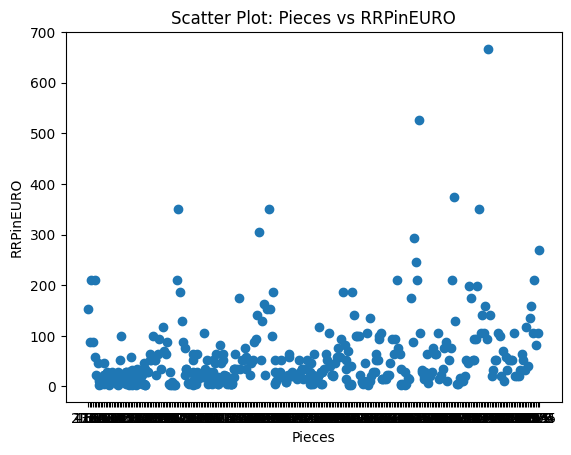

In [16]:

# Question 6
# Let's say we are interested in a scatter plot between 'Pieces' and 'RRPinEURO'
import matplotlib.pyplot as plt

# Question 6
print("\nQuestion 6:")
plt.scatter(result_df['Pieces'], result_df['RRPinEURO'])  # Use result_df instead of df
plt.xlabel('Pieces')
plt.ylabel('RRPinEURO')
plt.title('Scatter Plot: Pieces vs RRPinEURO')
plt.show()



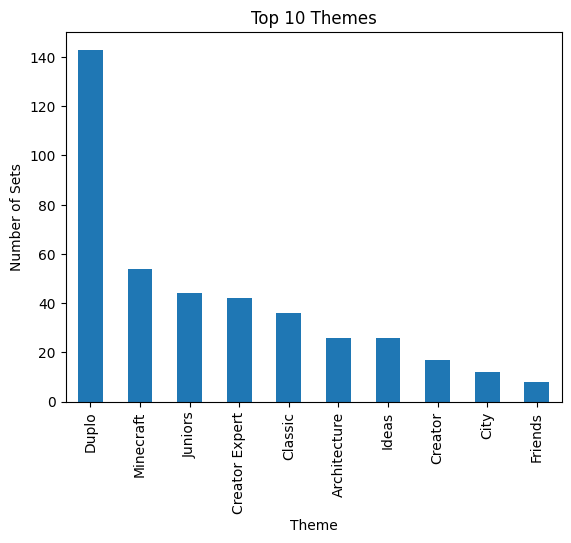

In [17]:
# Example: Bar chart for the top 10 Themes
top_themes = df['Theme'].value_counts().nlargest(10)
top_themes.plot(kind='bar')
plt.xlabel('Theme')
plt.ylabel('Number of Sets')
plt.title('Top 10 Themes')
plt.show()


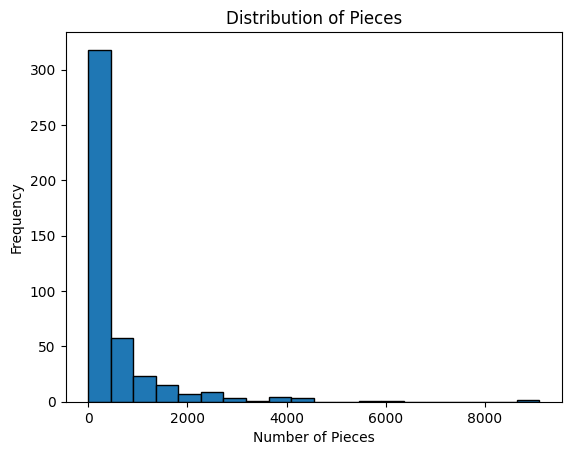

In [18]:
# Example: Histogram for the distribution of Pieces (excluding non-numeric values)
pieces_numeric = pd.to_numeric(df['Pieces'], errors='coerce')
plt.hist(pieces_numeric.dropna(), bins=20, edgecolor='black')
plt.xlabel('Number of Pieces')
plt.ylabel('Frequency')
plt.title('Distribution of Pieces')
plt.show()


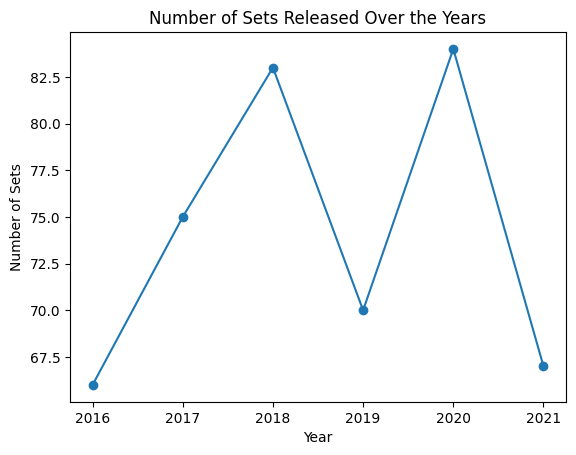

In [19]:
# Example: Line chart for the trend in the number of sets released over the years
sets_per_year = df.groupby('Year released').size()
sets_per_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.title('Number of Sets Released Over the Years')
plt.show()


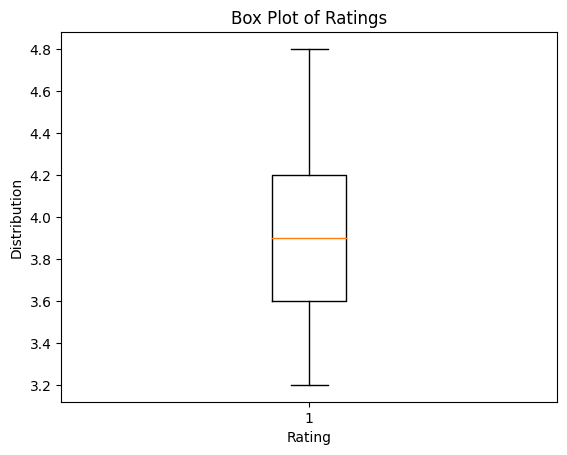

In [33]:
# Example: Box plot for the distribution of Ratings (extract numeric part)
ratings_numeric = df['Rating'].str.extract(r'(\d+\.\d+)', expand=False).dropna().astype(float)
plt.boxplot(ratings_numeric)
plt.xlabel('Rating')
plt.ylabel('Distribution')
plt.title('Box Plot of Ratings')
plt.show()


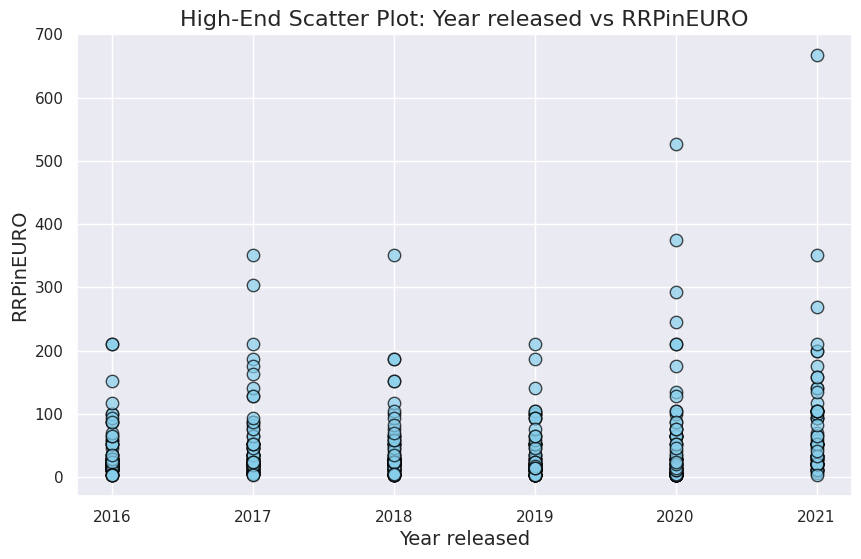

In [36]:
# Question 6: Enhanced Scatter plot for 'Year released' vs 'RRPinEURO'
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced styling

# Set a dark background style using Seaborn
sns.set(style='darkgrid')

# Create the scatter plot with enhanced styling
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(result_df['Year released'], result_df['RRPinEURO'], s=80, color='skyblue', edgecolors='black', alpha=0.7)
plt.xlabel('Year released', fontsize=14)
plt.ylabel('RRPinEURO', fontsize=14)
plt.title('High-End Scatter Plot: Year released vs RRPinEURO', fontsize=16)
plt.show()
